# Percentage of Normal Precipitation analyses using Climate DT modeled data 2020-2040

Authors: Dr. Alen Berta (CGI), Cesare Rossi (CGI)

Licence: MIT

Reference:
https://confluence.ecmwf.int/display/CKB/Climate+extreme+indices+and+heat+stress+indicators+derived+from+CMIP6+global+climate+projections%3A+Product+User+Guide

Notes:
This example is intended for hands-on learning and does not constitute a comprehensive climatic study. This notebook will showcase the time series point analyses for 2 cities in Croatia (Zagreb as representative of continental climate and Dubrovnik as representative of Mediterranean climate). Service for analysing larger areas and exporting corresponding results in raster files will soon be available on Insula platform.

This notebook will provide the analyses relevant for detecting changes in precipitation due to climate change. The data used stem from Climate DT (Link) and will provide the calculation of some climate extreme indices (https://confluence.ecmwf.int/display/CKB/Climate+extreme+indices+and+heat+stress+indicators+derived+from+CMIP6+global+climate+projections%3A+Product+User+Guide ).

The data used here are based on SSP3 NEMO model, representing next to worst scenario modeled in Shared Socio-Economic Pathways (SSPs) predicting the highest population development and lowest GDP amongst the considered scenarios in the near future, with global mean temperature rising between 3.85 and 4.55 C until 2100. (more info and photo credit https://www.carbonbrief.org/explainer-how-shared-socioeconomic-pathways-explore-future-climate-change/)
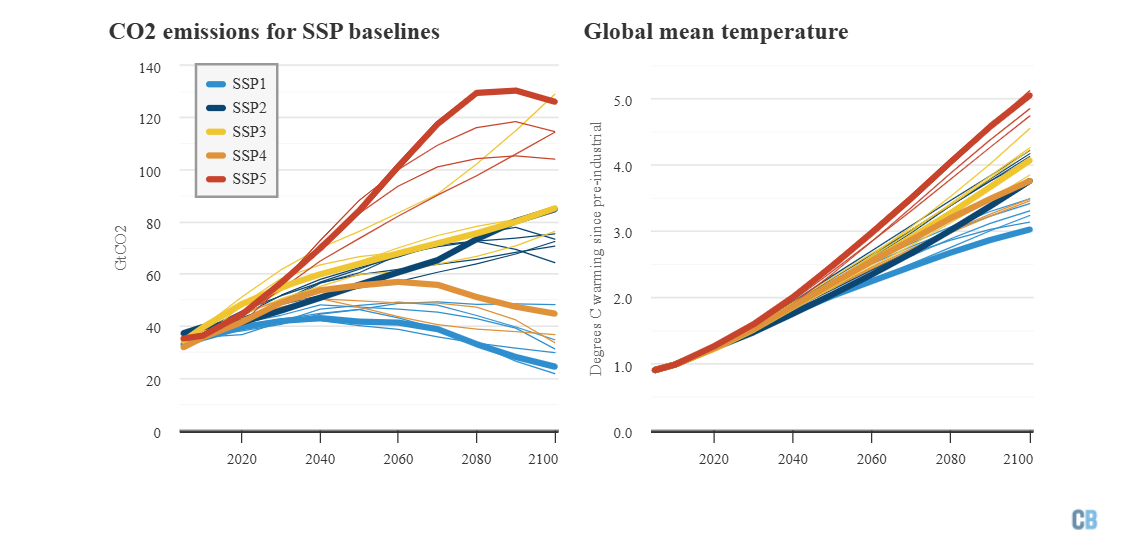

This notebook will provide the analyses relevant for detecting precipitation related changes due to climate change. The data used stem from Climate DT (https://destine.ecmwf.int/news/climate-change-adaptation-digital-twin-a-window-to-the-future-of-our-planet/) and will provide the calculation of some climate extreme indices (https://confluence.ecmwf.int/display/CKB/Climate+extreme+indices+and+heat+stress+indicators+derived+from+CMIP6+global+climate+projections%3A+Product+User+Guide).

Specifically we will present the approach to:

 1) Calculating precipitation percentage of average (also referred as percent of normal precipitation or Percent of normal index) with monthly precipitation summaries
 2) Visualize the same index/indicator with the average values from 1990-2020 (extracted fromn ERA5) and 2021-2040 (extracted from the Climate DT)
 3) Visualize the standard deviation on monthly level concerning the averages from 1990-2020 and 2021-2040

## Data access

<div style="border: 2px solid #28a745; background-color: #d4edda; padding: 10px; border-radius: 5px;">
  <strong>💡 Tip:</strong> Provide here your Destination Earth credentials. Ensure that you requested and obtained an access policy upgrade, which is necessary to read the Climate DT data of this example. See <a href="https://platform.destine.eu/access-policy-upgrade/">https://platform.destine.eu/access-policy-upgrade</a>.
</div>

In [ ]:
%%capture cap
%run ./cacheb-authentication.py

In [2]:
output_1 = cap.stdout.split('}\n')
token = output_1[-1][0:-1]

from pathlib import Path
with open(Path.home() / ".netrc", "a") as fp:
    fp.write(token)

## Data loading

In [3]:
import xarray as xr
import pandas as pd
import os
from utils import precipitation

In [4]:
data_prec = xr.open_dataset(
    "https://cacheb.dcms.destine.eu/d1-climate-dt/ScenarioMIP-SSP3-7.0-IFS-NEMO-0001-high-sfc-v0.zarr",
    storage_options={"client_kwargs":{"trust_env":"true"}},
    chunks={},
    engine="zarr",
)

In [5]:
data_prec

<xarray.Dataset> Size: 800TB
Dimensions:           (time: 175320, latitude: 4096, longitude: 8193)
Coordinates:
    entireAtmosphere  float64 8B ...
  * latitude          (latitude) float64 33kB -90.0 -89.96 -89.91 ... 89.96 90.0
  * longitude         (longitude) float64 66kB -180.0 -180.0 ... 180.0 180.0
    step              timedelta64[ns] 8B ...
    surface           float64 8B ...
  * time              (time) datetime64[ns] 1MB 2020-01-01 ... 2039-12-31T23:...
Data variables: (12/34)
    blh               (time, latitude, longitude) float32 24TB dask.array<chunksize=(48, 512, 512), meta=np.ndarray>
    chnk              (time, latitude, longitude) float32 24TB dask.array<chunksize=(48, 512, 512), meta=np.ndarray>
    d2m               (time, latitude, longitude) float32 24TB dask.array<chunksize=(48, 512, 512), meta=np.ndarray>
    e                 (time, latitude, longitude) float32 24TB dask.array<chunksize=(48, 512, 512), meta=np.ndarray>
    ewss              (time, latitude, longitude) float32 24TB dask.array<chunksize=(48, 512, 512), meta=np.ndarray>
    hcc               (time, latitude, longitude) float32 24TB dask.array<chunksize=(48, 512, 512), meta=np.ndarray>
    ...                ...
    tp                (time, latitude, longitude) float32 24TB dask.array<chunksize=(48, 512, 512), meta=np.ndarray>
    tprate            (time, latitude, longitude) float32 24TB dask.array<chunksize=(48, 512, 512), meta=np.ndarray>
    tsr               (time, latitude, longitude) float32 24TB dask.array<chunksize=(48, 512, 512), meta=np.ndarray>
    ttr               (time, latitude, longitude) float32 24TB dask.array<chunksize=(48, 512, 512), meta=np.ndarray>
    u10               (time, latitude, longitude) float32 24TB dask.array<chunksize=(48, 512, 512), meta=np.ndarray>
    v10               (time, latitude, longitude) float32 24TB dask.array<chunksize=(48, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            2
    GRIB_subCentre:          1003
    history:                 2024-11-14T08:10 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts

In [6]:
tp = data_prec.tp.astype("float32") *1000 #conversion from m to mm
tp.attrs["units"] = "mm"

In [7]:
zagreb_lat_lon=(45.8130,15.9772)
dubrovnik_lat_lon=(42.6507, 18.0944)

Select your year of interest between 2020 and 2040.

In [8]:
year_of_interest = "2035"

In [9]:
# Select the data for Zagreb and Dubrovnik
tp_zagreb = tp.sel(latitude=zagreb_lat_lon[0], longitude=zagreb_lat_lon[1], method='nearest')
tp_dubrovnik = tp.sel(latitude=dubrovnik_lat_lon[0], longitude=dubrovnik_lat_lon[1], method='nearest')

In [10]:
# Assuming 'tp_zagreb' and 'tp_dubrovnik' are your xarray DataArrays containing the precipitation data
thresholds = [1] # select 1, 10 or 20

# Summarize the precipitation data for Zagreb and Dubrovnik
summary_zagreb, monthly_summary_zagreb = precipitation.summarize_precipitation(tp_zagreb, thresholds)
summary_dubrovnik, monthly_summary_dubrovnik = precipitation.summarize_precipitation(tp_dubrovnik, thresholds)

<div style="border: 2px solid #f5c518; background-color: #fff3cd; padding: 10px; border-radius: 5px;">
  <strong>⚠️ Warning: </strong>The following cells usually takes <b>1 hour</b> for each city/pixel/point. <b>In case of the error "ContentLengthError: 400, message='Not enough data for satisfy content length header.'" try to re-run the cell.</b>
</div>

In [13]:
# Convert the monthly summaries to pandas DataFrames for easier viewing
%time monthly_summary_zagreb_df = monthly_summary_zagreb.to_dataframe()

CPU times: user 17min 55s, sys: 7min 21s, total: 25min 17s
Wall time: 1h 4min 8s


In [14]:
%time monthly_summary_dubrovnik_df = monthly_summary_dubrovnik.to_dataframe()

CPU times: user 14min 35s, sys: 6min 37s, total: 21min 13s
Wall time: 54min 55s


In [15]:
# Save the results - this is useful later in case you would like to skip to the computation step above and play with the data
csv_directory = "csv"
if not os.path.exists(csv_directory):
    os.makedirs(csv_directory)
    
monthly_summary_zagreb_df.to_csv(f'{csv_directory}/Precipitation_monthly_counts_Zagreb.csv', index=True, chunksize=100)
monthly_summary_dubrovnik_df.to_csv(f'{csv_directory}/Precipitation_monthly_counts_Dubrovnik.csv', index=True, chunksize=100)

Read back the CSVs and use ERA5 data as a reference:

In [16]:
monthly_summary_zagreb_df = pd.read_csv(f'{csv_directory}/Precipitation_monthly_counts_Zagreb.csv', index_col=0, parse_dates=True)
monthly_summary_dubrovnik_df = pd.read_csv(f'{csv_directory}/Precipitation_monthly_counts_Dubrovnik.csv', index_col=0, parse_dates=True)

reference_directory = "reference"
monthly_summary_dubrovnik_df_era5 = pd.read_csv(f'{reference_directory}/Precipitation_monthly_counts_Dubrovnik_ERA5.csv', index_col=0, parse_dates=True)
monthly_summary_zagreb_df_era5 = pd.read_csv(f'{reference_directory}/Precipitation_monthly_counts_Zagreb_ERA5.csv', index_col=0, parse_dates=True)

## Percentage of Normal

First we will plot the monthly summaries with historical and future average and standard deviation. Then we will also calculate and plot the percentages of normal precipitation for specific month.

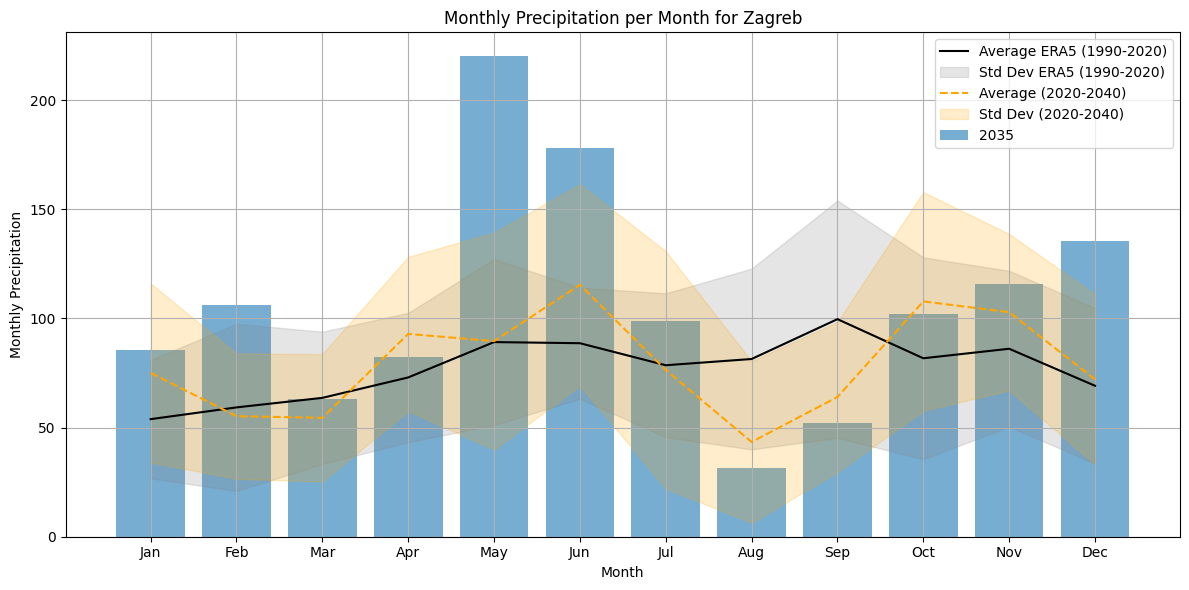

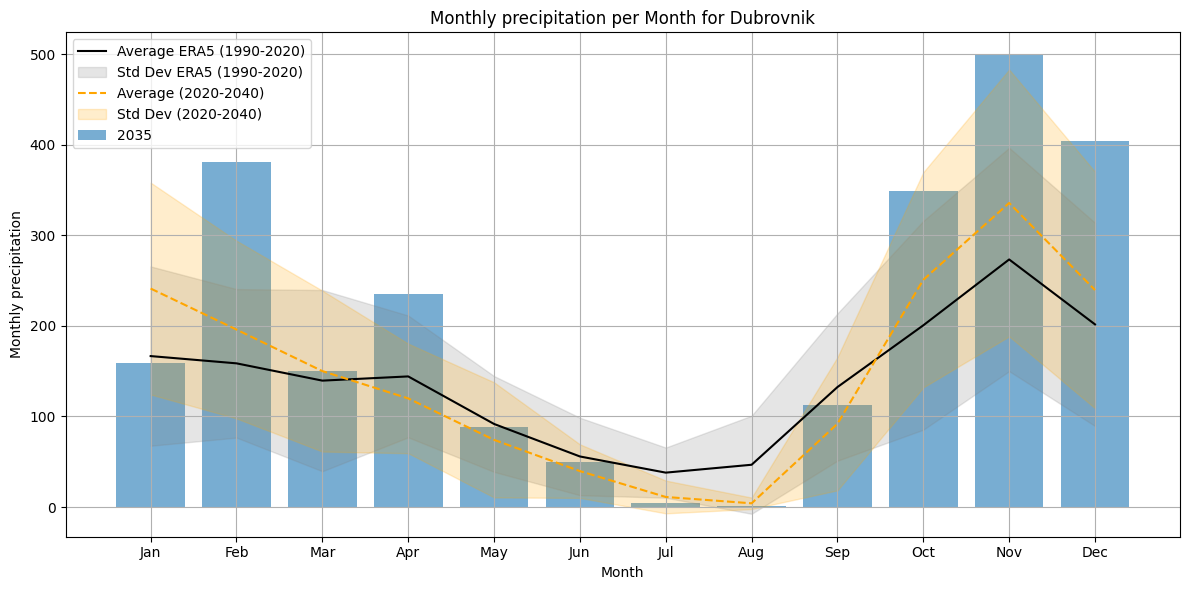

In [17]:
# Extract data for the year of interest
data_selected_zagreb = monthly_summary_zagreb_df[monthly_summary_zagreb_df.index.year == int(year_of_interest)]
data_selected_dubrovnik = monthly_summary_dubrovnik_df[monthly_summary_dubrovnik_df.index.year == int(year_of_interest)]

# Calculate the average and std for the whole period and for the ERA5 data
monthly_summary_zagreb_df['month'] = monthly_summary_zagreb_df.index.month
monthly_summary_zagreb_df_era5['month'] = monthly_summary_zagreb_df_era5.index.month

avg_zagreb = monthly_summary_zagreb_df.groupby('month')['monthly_sums'].mean()
std_zagreb = monthly_summary_zagreb_df.groupby('month')['monthly_sums'].std()

avg_zagreb_era5 = monthly_summary_zagreb_df_era5.groupby('month')['monthly_sums'].mean()
std_zagreb_era5 = monthly_summary_zagreb_df_era5.groupby('month')['monthly_sums'].std()

monthly_summary_dubrovnik_df['month'] = monthly_summary_dubrovnik_df.index.month
monthly_summary_dubrovnik_df_era5['month'] = monthly_summary_dubrovnik_df_era5.index.month

avg_dubrovnik = monthly_summary_dubrovnik_df.groupby('month')['monthly_sums'].mean()
std_dubrovnik = monthly_summary_dubrovnik_df.groupby('month')['monthly_sums'].std()

avg_dubrovnik_era5 = monthly_summary_dubrovnik_df_era5.groupby('month')['monthly_sums'].mean()
std_dubrovnik_era5 = monthly_summary_dubrovnik_df_era5.groupby('month')['monthly_sums'].std()

   # Plot the data for Zagreb - monthly precipitation
precipitation.plot_data(
    city_name="Zagreb",
    data_selected=data_selected_zagreb,
    avg_data=avg_zagreb,
    std_data=std_zagreb,
    avg_era5=avg_zagreb_era5,
    std_era5=std_zagreb_era5,
    yoi=year_of_interest,
    ylabel="Monthly Precipitation",
    column_name="monthly_sums"
)

# Plot the data for Dubrovnik - monthly precipitationm
precipitation.plot_data(
    city_name="Dubrovnik",
    data_selected=data_selected_dubrovnik,
    avg_data=avg_dubrovnik,
    std_data=std_dubrovnik,
    avg_era5=avg_dubrovnik_era5,
    std_era5=std_dubrovnik_era5,
    yoi=year_of_interest,
    ylabel="Monthly precipitation",
    column_name="monthly_sums"
)

In [18]:
# Save the calculated averages and standard deviations to CSV files

# Create DataFrames for Zagreb
avg_std_zagreb = pd.DataFrame({
    'month': avg_zagreb.index,
    'avg_zagreb': avg_zagreb.values,
    'std_zagreb': std_zagreb.values,
    'avg_zagreb_era5': avg_zagreb_era5.values,
    'std_zagreb_era5': std_zagreb_era5.values
})

# Create DataFrames for Dubrovnik
avg_std_dubrovnik = pd.DataFrame({
    'month': avg_dubrovnik.index,
    'avg_dubrovnik': avg_dubrovnik.values,
    'std_dubrovnik': std_dubrovnik.values,
    'avg_dubrovnik_era5': avg_dubrovnik_era5.values,
    'std_dubrovnik_era5': std_dubrovnik_era5.values
})

# Save to CSV
avg_std_zagreb.to_csv(f'{csv_directory}/precipitation_avg_std_zagreb.csv', index=False)
avg_std_dubrovnik.to_csv(f'{csv_directory}/precipitation_avg_std_dubrovnik.csv', index=False)

In [19]:
print(avg_std_zagreb)

    month  avg_zagreb  std_zagreb  avg_zagreb_era5  std_zagreb_era5
0       1   75.056313   40.952463        53.877028        27.085679
1       2   55.244505   28.682806        59.263850        38.306723
2       3   54.470308   29.186873        63.632761        30.310702
3       4   92.939052   35.332589        72.988062        29.616560
4       5   89.628561   49.684666        89.189305        38.042093
5       6  115.416733   46.122042        88.676846        25.466670
6       7   76.442879   54.374396        78.578824        32.977217
7       8   43.423433   37.027418        81.444036        41.427465
8       9   64.017261   34.387326        99.703596        54.376162
9      10  107.836618   50.078024        81.776580        46.248308
10     11  102.898280   35.848998        86.135085        35.719202
11     12   72.100969   38.931197        69.172946        35.622486


## Load the data from the CSV files and calculate the Percentage of Normal Precipitation

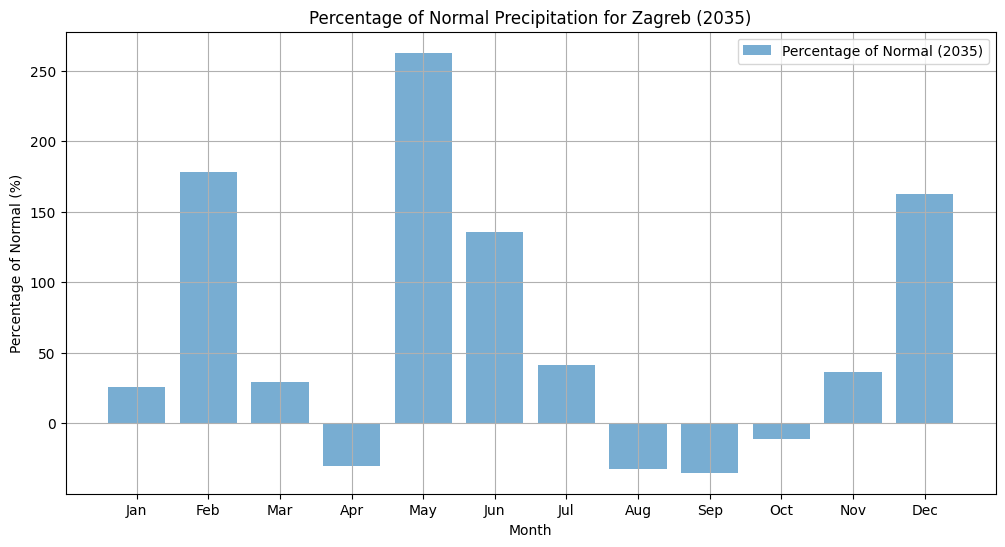

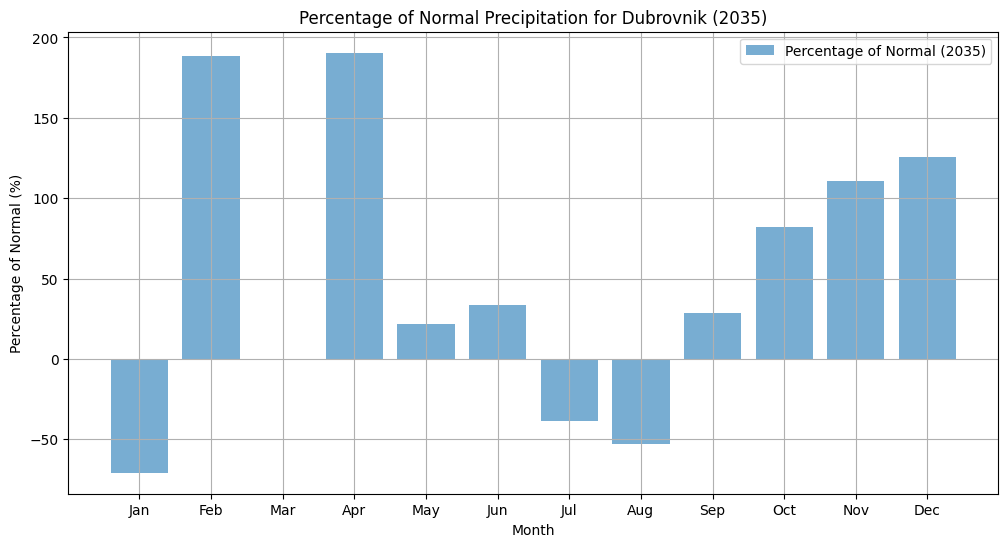

In [20]:
import matplotlib.pyplot as plt

# Load the data from the CSV files
monthly_summary_zagreb_df = pd.read_csv(f'{csv_directory}/Precipitation_monthly_counts_Zagreb.csv', index_col=0, parse_dates=True)
monthly_summary_dubrovnik_df = pd.read_csv(f'{csv_directory}/Precipitation_monthly_counts_Dubrovnik.csv', index_col=0, parse_dates=True)

# Load the average and std data from the created CSV files
avg_std_zagreb = pd.read_csv(f'{csv_directory}/precipitation_avg_std_zagreb.csv')
avg_std_dubrovnik = pd.read_csv(f'{csv_directory}/precipitation_avg_std_dubrovnik.csv')

# Extract data for the year of interest
data_selected_zagreb = monthly_summary_zagreb_df[monthly_summary_zagreb_df.index.year == int(year_of_interest)].copy()
data_selected_dubrovnik = monthly_summary_dubrovnik_df[monthly_summary_dubrovnik_df.index.year == int(year_of_interest)].copy()

# Ensure the 'month' column is present in the 2035 data
data_selected_zagreb.loc[:, 'time'] = data_selected_zagreb.index.month
data_selected_dubrovnik.loc[:, 'time'] = data_selected_dubrovnik.index.month

# Ensure the 'month' column is present in the average and std data
avg_std_zagreb['month'] = avg_std_zagreb.index + 1
avg_std_dubrovnik['month'] = avg_std_dubrovnik.index + 1

# Calculate the Percentage of Normal for Zagreb
percentage_normal_zagreb = ((data_selected_zagreb['monthly_sums'].values - avg_std_zagreb['avg_zagreb'].values) / avg_std_zagreb['std_zagreb'].values) * 100

# Calculate the Percentage of Normal for Dubrovnik
percentage_normal_dubrovnik = ((data_selected_dubrovnik['monthly_sums'].values - avg_std_dubrovnik['avg_dubrovnik'].values) / avg_std_dubrovnik['std_dubrovnik'].values) * 100

# Plot the Percentage of Normal for Zagreb
plt.figure(figsize=(12, 6))
plt.bar(avg_std_zagreb['month'], percentage_normal_zagreb, alpha=0.6, label='Percentage of Normal (2035)')
plt.xlabel('Month')
plt.ylabel('Percentage of Normal (%)')
plt.title('Percentage of Normal Precipitation for Zagreb (2035)')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Plot the Percentage of Normal for Dubrovnik
plt.figure(figsize=(12, 6))
plt.bar(avg_std_dubrovnik['month'], percentage_normal_dubrovnik, alpha=0.6, label='Percentage of Normal (2035)')
plt.xlabel('Month')
plt.ylabel('Percentage of Normal (%)')
plt.title('Percentage of Normal Precipitation for Dubrovnik (2035)')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()